In [1]:
%pylab inline
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_columns',None)

Populating the interactive namespace from numpy and matplotlib


In [43]:
data = pd.read_csv('acc_nonorm_touse.csv')
target = pd.read_csv('target_touse.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269360 entries, 0 to 269359
Columns: 172 entries, funded_amnt to verification_status_joint_Verified
dtypes: float64(92), int64(80)
memory usage: 353.5 MB


In [45]:
full = pd.concat([data,target],axis=1)

In [8]:
cols_w_sec_app = [col for col in data.columns if col.startswith('sec_app_')]
cols_w_sec_app

['sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'sec_app_duration_of_credit_months']

In [55]:
full.filter(cols_w_sec_app).describe()

,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,sec_app_duration_of_credit_months
count,269360.000000,269360.000000,269360.000000,269360.000000,269360.000000,269360.000000,269360.000000,269360.000000,269360.000000,269360.000000,269360.000000,269360.000000
mean,8.943332,9.003713,-0.971796,-0.962066,-0.813885,-0.096807,-0.940143,-0.794843,-0.983706,-0.983142,-0.787147,1.677617
std,80.511429,80.997989,0.270854,0.377918,1.710735,8.027410,0.624642,1.949699,0.149416,0.149304,3.325985,24.240108
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,830.000000,834.000000,6.000000,15.000000,82.000000,182.500000,38.000000,92.000000,20.000000,11.000000,132.000000,688.000000


In [56]:
mod_data = full.drop(['sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts',\
           'sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog','sec_app_duration_of_credit_months'],axis=1)

In [57]:
cols_w_addr_state = [col for col in mod_data.columns if col.startswith('addr_state_')]
mod_data = mod_data[mod_data.columns.drop(list(mod_data.filter(cols_w_addr_state)))]

In [58]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269360 entries, 0 to 269359
Columns: 113 entries, funded_amnt to loan_status_binary
dtypes: float64(82), int64(31)
memory usage: 232.2 MB


In [50]:
funded_cols = [col for col in data.columns if 'funded' in col]
funded_cols

['funded_amnt', 'funded_amnt_inv']

In [59]:
cols_w_verf_status = [col for col in mod_data.columns if col.startswith('verification_status')]
cols_w_verf_status

['verification_status_Source Verified',
 'verification_status_Verified',
 'verification_status_joint_Not Verified',
 'verification_status_joint_Source Verified',
 'verification_status_joint_Verified']

In [52]:
mod_data.verification_status_Verified.value_counts()

0    179524
1     89836
Name: verification_status_Verified, dtype: int64

In [60]:
mod_data.columns[:30]

Index(['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m'],
      dtype='object')

In [61]:
mod_data.columns[30:]

Index(['open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', '

In [82]:
set1 = mod_data.sample(frac = 0.3)
set2 = mod_data.sample(frac = 0.3)

In [83]:
#checking the distribution between two random sample sets
set1.describe()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,year,month,duration_of_credit_months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,loan_status_binary
count,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,8.080800e+04,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,8.080800e+04,80808.000000,80808.000000,80808.000000,80808.000000,80808.0,80808.000000,80808.000000,80808.000000,80808.000000,8.080800e+04,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,8.080800e+04,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,8.080800e+04,8.080800e+04,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000
mean,14843.896953,14812.380043,0.297532,14.154571,448.099509,2.999196,12.986932,5.453878,7.405372e+04,18.932270,0.329113,693.103344,697.103430,0.711328,516.393476,834.441070,11.688991,0.223777,1.594738e+04,52.786920,24.829769,0.018983,740.702925,1.0,2422.596949,-0.558106,0.005173,215.763575,1.260471e+05,-0.119010,0.592627,-0.245384,0.165046,601.072456,14898.852688,25.567877,0.044909,0.748342,2264.684091,24.357130,2.990807e+04,-0.103604,0.078346,0.437766,4.730249,11898.796332,8927.309301,58.276505,0.008984,17.972107,114.355336,218.056442,11.701750,7.039056,1.478740,65.992327,768.714880,124.386039,674.109667,0.435687,3.486462

In [84]:
set2.describe()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,year,month,duration_of_credit_months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,loan_status_binary
count,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,8.080800e+04,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,8.080800e+04,80808.000000,80808.000000,80808.000000,80808.000000,80808.0,80808.000000,80808.000000,80808.000000,80808.000000,8.080800e+04,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,8.080800e+04,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,8.080800e+04,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000
mean,14865.517647,14836.584534,0.298164,14.177641,449.163790,3.005222,13.009838,5.466934,7.420210e+04,18.949628,0.329782,693.110212,697.110274,0.709806,516.981611,834.121498,11.717305,0.225980,1.605123e+04,52.847648,24.908400,0.018550,741.197307,1.0,2374.810851,-0.558952,0.005086,219.406544,1.275650e+05,-0.125903,0.592045,-0.252401,0.156829,604.622277,15008.646062,25.311826,0.034242,0.724953,2246.899775,24.174624,3.000678e+04,-0.113689,0.060848,0.415739,4.736486,12016.487959,8904.978418,58.565517,0.008898,16.947765,114.932321,217.910801,11.776705,7.067530,1.480150,64.940216,768.083383,124.738961,673.259492,0.440897,3.480039

In [85]:
#dealing with set 1
y1 = set1.loan_status_binary
x1 = set1.drop('loan_status_binary',axis=1)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=0) #stratify?

In [87]:
X_train.shape

(64646, 112)

## Random Forest Test

In [88]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()
randomForest.fit(X_train, y_train)

RandomForestClassifier()

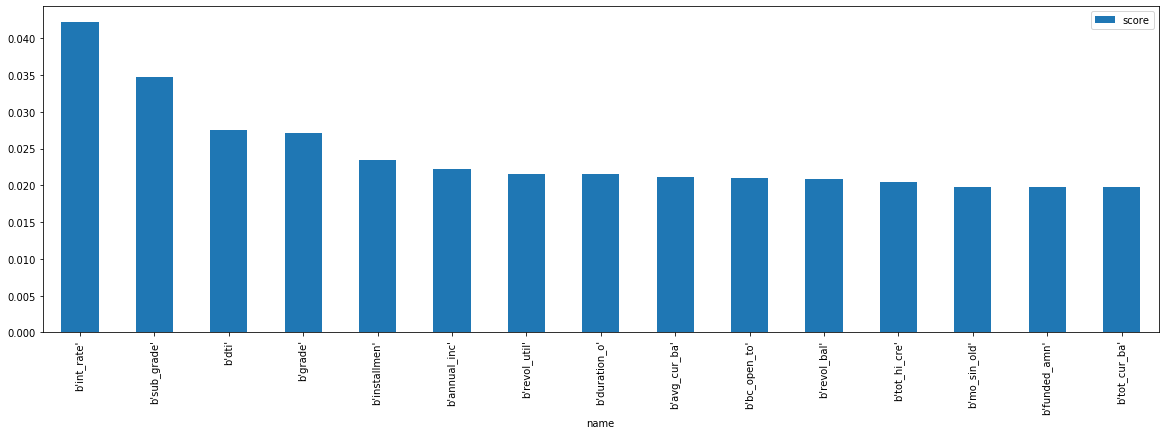

In [89]:
feature_importance = list(zip(X_train.columns[:-2], randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score',figsize=(20,6))

In [90]:
train_error = 1 - randomForest.score(X_train, y_train)
test_error  = 1 - randomForest.score(X_test, y_test)
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

The training error is: 0.00000
The test     error is: 0.34971


In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, randomForest.predict(X_train))

array([[32302,     0],
       [    0, 32344]])

In [97]:
confusion_matrix(y_test, randomForest.predict(X_test))

array([[5252, 2906],
       [2746, 5258]])

## Gradient Boosting test

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [93]:
train_error = 1 - gbm.score(X_train, y_train)
test_error  = 1 - gbm.score(X_test, y_test)
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

The training error is: 0.33108
The test     error is: 0.34012


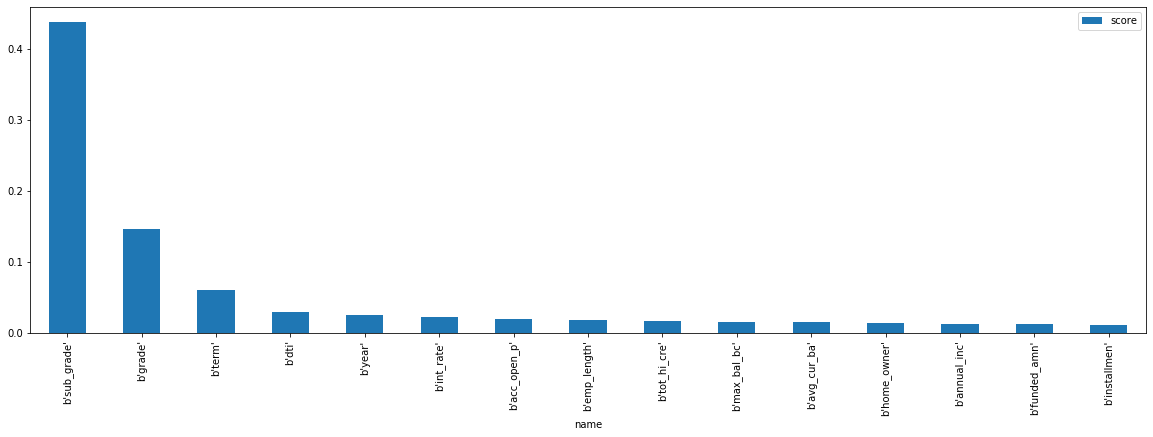

In [94]:
feature_importance = list(zip(X_train.columns[:-2], gbm.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score',figsize=(20,6))

In [98]:
confusion_matrix(y_train, gbm.predict(X_train))

array([[21109, 11193],
       [10210, 22134]])

In [99]:
confusion_matrix(y_test, gbm.predict(X_test))

array([[5297, 2861],
       [2636, 5368]])

## Tuning sample size

In [101]:
y = mod_data.loan_status_binary
x = mod_data.drop('loan_status_binary',axis=1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) #stratify?

In [103]:
randomForest_full = ensemble.RandomForestClassifier()
randomForest_full.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
train_error = 1 - randomForest_full.score(X_train, y_train)
test_error  = 1 - randomForest_full.score(X_test, y_test)
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

The training error is: 0.00000
The test     error is: 0.34487


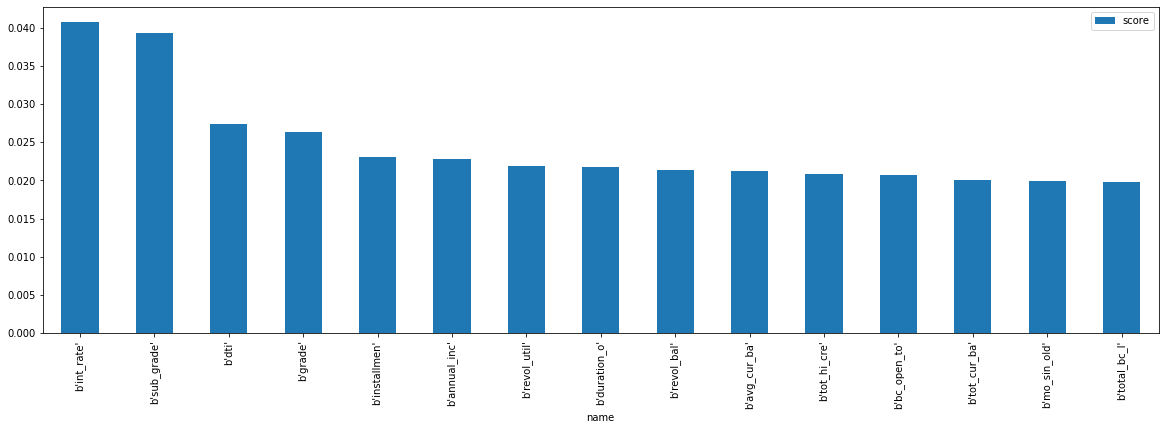

In [105]:
feature_importance = list(zip(X_train.columns[:-2], randomForest_full.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score',figsize=(20,6))

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_full = GradientBoostingClassifier()
gbm_full.fit(X_train, y_train)

GradientBoostingClassifier()

In [107]:
train_error = 1 - gbm_full.score(X_train, y_train)
test_error  = 1 - gbm_full.score(X_test, y_test)
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

The training error is: 0.33334
The test     error is: 0.33604


In [108]:
X_train.shape

(215488, 112)

In [109]:
X_test.shape

(53872, 112)